In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [9]:
# Load Data From CSV File
df = pd.read_csv('../excel/AnimeList.csv')
cols_id = list(df.columns)

# Clean some anime episodes that havent been updated. From personal experience, animes that are Hentai genre,
# Ova, Movie, Special anime type mainly have only 1 episode
df.loc[(df["genre"]=="Hentai") & (df["episodes"]==0),"episodes"] = 1
df.loc[(df["type"]=="OVA") & (df["episodes"]==0),"episodes"] = 1
df.loc[(df["type"] == "Movie") & (df["episodes"]==0), "episodes"] = 1
df.loc[(df["type"] == "Special") & (df["episodes"]==0), "episodes"] = 1

# Fix image_url column
df['image_url'] = df['image_url'].str.replace('myanimelist.cdn-dena.com','cdn.myanimelist.net')

# Adjust NaN values
for col in cols_id:
    try:
        float(df_filtered[col][0])
        df[col].fillna(df[col].median(),inplace = True)
    except:
        df[col].fillna(0, inplace = True)
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://cdn.myanimelist.net/images/anime/12/35...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://cdn.myanimelist.net/images/anime/13/58...,TV,Manga,26,Finished Airing,...,0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://cdn.myanimelist.net/images/anime/11/10...,TV,Manga,51,Finished Airing,...,0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://cdn.myanimelist.net/images/anime/13/32...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://cdn.myanimelist.net/images/anime/6/418...,TV,Manga,25,Finished Airing,...,0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [15]:
df_review = pd.read_csv('../excel/anime_reviews.csv')
df_review.rename(columns={"uid": "anime_id"}, inplace=True)
df_review = df_review[['anime_id', 'synopsis']]
df_review.head()

,anime_id,synopsis
0,28891,Following their participation at the Inter-Hig...
1,23273,Music accompanies the path of the human metron...
2,34599,The Abyss—a gaping chasm stretching down into ...
3,5114,"""In order for something to be obtained, someth..."
4,31758,After helping revive the legendary vampire Kis...


In [18]:
df = pd.merge(df, df_review, on='anime_id')
df['image_url'] = df['image_url'].str.replace('myanimelist.cdn-dena.com','cdn.myanimelist.net')
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,synopsis
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://cdn.myanimelist.net/images/anime/12/35...,TV,Manga,12,Finished Airing,...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Ririchiyo Shirakiin is the sheltered daughter ...
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://cdn.myanimelist.net/images/anime/13/58...,TV,Manga,26,Finished Airing,...,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...","During his summer vacation, middle school stud..."
2,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://cdn.myanimelist.net/images/anime/13/58...,TV,Manga,26,Finished Airing,...,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...","During his summer vacation, middle school stud..."
3,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://cdn.myanimelist.net/images/anime/11/10...,TV,Manga,51,Finished Airing,...,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Now Utau has left Easter and restarted her sin...
4,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://cdn.myanimelist.net/images/anime/13/32...,TV,Original,38,Finished Airing,...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...","In a fairy tale come to life, the clumsy, swee..."


In [3]:
# Check number of individual values in each column
cols_id = list(df.columns)
for col in cols_id:
    a = len(df[col].value_counts())
    print(a, col)
    print("==============================================================================")

14478 anime_id
14477 title
5607 title_english
13702 title_japanese
8576 title_synonyms
14383 image_url
7 type
16 source
196 episodes
3 status
2 airing
10026 aired_string
9649 aired
301 duration
7 rating
630 score
5908 scored_by
10640 rank
11759 popularity
7810 members
1229 favorites
1039 background
222 premiered
442 broadcast
9420 related
3222 producer
194 licensor
779 studio
4545 genre
4328 opening_theme
5458 ending_theme


In [4]:
df_filtered = df
new = pd.DataFrame(df_filtered.groupby("type").size())
new.columns = ['count']
new = new.sort_values(by = "count")
print(new)
a = new.index.tolist()
a

         count
type          
Unknown     30
Music      849
ONA       1144
Special   1948
Movie     2624
OVA       3612
TV        4271


['Unknown', 'Music', 'ONA', 'Special', 'Movie', 'OVA', 'TV']

In [5]:
# Columns with less than 50 distinct values will be converted to numbers, 
# the values with more population will get higher index value
first_filtered = {}
for col in cols_id:
    if len(df_filtered[col].value_counts()) < 50:
        new = pd.DataFrame(df_filtered.groupby(col).size())
        new.columns = ['count']
        new = new.sort_values(by = "count")
        a = new.index.tolist()
        converted = {}
        new_id = []
        old_i = {}
        start = 0
        for i in new.values:
            i = int(i)
            if i not in list(old_i.keys()):
                new_id.append(start)
                old_i[i] = start
                converted[a[start]] = start
                start += 1
            else:
                new_id.append(old_i[i])
        print(col)
        print(converted)
        first_filtered[col] = converted
        print("=======================")
        new["new_id"] = new_id
        df_filtered[col] = df_filtered[col].replace(new.index,new.new_id)
print("All converted attributes: ")
print(first_filtered)
df_filtered

type
{'Unknown': 0, 'Music': 1, 'ONA': 2, 'Special': 3, 'Movie': 4, 'OVA': 5, 'TV': 6}
source
{'Radio': 0, 'Digital manga': 1, 'Card game': 2, 'Book': 3, 'Picture book': 4, 'Web manga': 5, '4-koma manga': 6, 'Music': 7, 'Novel': 8, 'Other': 9, 'Light novel': 10, 'Game': 11, 'Visual novel': 12, 'Manga': 13, 'Original': 14, 'Unknown': 15}
status
{'Not yet aired': 0, 'Currently Airing': 1, 'Finished Airing': 2}
airing
{True: 0, False: 1}
rating
{'None': 0, 'R+ - Mild Nudity': 1, 'R - 17+ (violence & profanity)': 2, 'Rx - Hentai': 3, 'PG - Children': 4, 'G - All Ages': 5, 'PG-13 - Teens 13 or older': 6}
All converted attributes: 
{'type': {'Unknown': 0, 'Music': 1, 'ONA': 2, 'Special': 3, 'Movie': 4, 'OVA': 5, 'TV': 6}, 'source': {'Radio': 0, 'Digital manga': 1, 'Card game': 2, 'Book': 3, 'Picture book': 4, 'Web manga': 5, '4-koma manga': 6, 'Music': 7, 'Novel': 8, 'Other': 9, 'Light novel': 10, 'Game': 11, 'Visual novel': 12, 'Manga': 13, 'Original': 14, 'Unknown': 15}, 'status': {'Not ye

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,...,0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,...,0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,...,0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,0,グッチョンパおもしろ話,0,https://myanimelist.cdn-dena.com/images/anime/...,6,15,5,2,...,0,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",0,0,0,Kids,[],[]
14474,21525,Geba Geba Shou Time!,0,ゲバゲバ笑タイム!,0,https://myanimelist.cdn-dena.com/images/anime/...,5,15,1,2,...,0,0,0,[],Studio Lotus,0,0,Comedy,[],[]
14475,37897,Godzilla: Hoshi wo Kuu Mono,0,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,4,9,1,0,...,0,0,0,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",0,0,0,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14476,34193,Nippon Mukashibanashi: Sannen Netarou,0,日本昔ばなし 三ねん寝太郎,0,https://myanimelist.cdn-dena.com/images/anime/...,5,9,1,2,...,0,0,0,[],0,0,0,"Fantasy, Kids",[],[]


In [6]:
# Clean licensor column
new_license = []
a = pd.DataFrame(df_filtered.licensor.value_counts())
a.index.name = "lisence_id"
for count in a.licensor:
    if count < 11:
        new_license.append(1)
    elif 10 < count < 50:
        new_license.append(2)
    elif count == 11105:
        new_license.append(0)
    else:
        new_license.append(3)
a['new_license'] = new_license
df_filtered['licensor'] = df_filtered['licensor'].replace(a.index, a.new_license)
df_filtered

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",3,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,...,0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",3,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,...,0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",3,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,...,0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,0,グッチョンパおもしろ話,0,https://myanimelist.cdn-dena.com/images/anime/...,6,15,5,2,...,0,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",0,0,0,Kids,[],[]
14474,21525,Geba Geba Shou Time!,0,ゲバゲバ笑タイム!,0,https://myanimelist.cdn-dena.com/images/anime/...,5,15,1,2,...,0,0,0,[],Studio Lotus,0,0,Comedy,[],[]
14475,37897,Godzilla: Hoshi wo Kuu Mono,0,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,4,9,1,0,...,0,0,0,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",0,0,0,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14476,34193,Nippon Mukashibanashi: Sannen Netarou,0,日本昔ばなし 三ねん寝太郎,0,https://myanimelist.cdn-dena.com/images/anime/...,5,9,1,2,...,0,0,0,[],0,0,0,"Fantasy, Kids",[],[]


In [7]:
df_filtered.licensor.unique()

array([3, 0, 2, 1], dtype=int64)

In [8]:
# Separate genres to columns
features = pd.concat([df_filtered["genre"].str.get_dummies(sep=", ")],axis=1)
features_cols = list(features.columns)
for feature_col in features_cols:
    df_filtered[feature_col] = features[feature_col]
df_filtered

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,...,0,0,0,0,0,1,0,0,0,0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,...,0,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,...,0,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,...,0,0,0,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,0,グッチョンパおもしろ話,0,https://myanimelist.cdn-dena.com/images/anime/...,6,15,5,2,...,0,0,0,0,0,0,0,0,0,0
14474,21525,Geba Geba Shou Time!,0,ゲバゲバ笑タイム!,0,https://myanimelist.cdn-dena.com/images/anime/...,5,15,1,2,...,0,0,0,0,0,0,0,0,0,0
14475,37897,Godzilla: Hoshi wo Kuu Mono,0,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,4,9,1,0,...,0,0,0,0,0,0,0,0,0,0
14476,34193,Nippon Mukashibanashi: Sannen Netarou,0,日本昔ばなし 三ねん寝太郎,0,https://myanimelist.cdn-dena.com/images/anime/...,5,9,1,2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Convert duration column to number
import re

new_duration = []
for time in df_filtered.duration:
    test_string = time
    temp = re.findall(r'\d+', test_string) 
    res = list(map(int, temp))
    if len(res) == 2:
        n = res[1] + 60 * res[0]
        new_duration.append(n)
    elif len(res) == 0:
        new_duration.append(0)
    else:
        new_duration.append(res[0])
df_filtered['duration'] = new_duration
df_filtered['duration'] = df_filtered.duration.mask(df_filtered.duration == 0, df_filtered['duration'].mean(skipna=True))
df_filtered

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,...,0,0,0,0,0,1,0,0,0,0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,...,0,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,...,0,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,...,0,0,0,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,0,グッチョンパおもしろ話,0,https://myanimelist.cdn-dena.com/images/anime/...,6,15,5,2,...,0,0,0,0,0,0,0,0,0,0
14474,21525,Geba Geba Shou Time!,0,ゲバゲバ笑タイム!,0,https://myanimelist.cdn-dena.com/images/anime/...,5,15,1,2,...,0,0,0,0,0,0,0,0,0,0
14475,37897,Godzilla: Hoshi wo Kuu Mono,0,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,4,9,1,0,...,0,0,0,0,0,0,0,0,0,0
14476,34193,Nippon Mukashibanashi: Sannen Netarou,0,日本昔ばなし 三ねん寝太郎,0,https://myanimelist.cdn-dena.com/images/anime/...,5,9,1,2,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Convert Premiered Column to Year column and Season Column
new_year = []
seasons = []
for time in df_filtered.premiered:
    test_string = str(time)
    temp = re.findall(r'\d+', test_string) 
    res = list(map(int, temp))
    if len(res) == 0:
        new_year.append(0)
        seasons.append(time)
    else:
        new_year.append(res[0])
        seasons.append(str(time).replace(str(res[0]), ''))

df_filtered['year'] = new_year
df_filtered['season'] = seasons
df_filtered

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year,season
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,...,0,0,0,1,0,0,0,0,2012,Winter
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,...,0,0,0,0,0,0,0,0,2007,Spring
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,...,0,0,0,0,0,0,0,0,2008,Fall
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,...,0,0,0,0,0,0,0,0,2002,Summer
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,...,0,0,0,0,0,0,0,0,2012,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,0,グッチョンパおもしろ話,0,https://myanimelist.cdn-dena.com/images/anime/...,6,15,5,2,...,0,0,0,0,0,0,0,0,1987,Fall
14474,21525,Geba Geba Shou Time!,0,ゲバゲバ笑タイム!,0,https://myanimelist.cdn-dena.com/images/anime/...,5,15,1,2,...,0,0,0,0,0,0,0,0,0,
14475,37897,Godzilla: Hoshi wo Kuu Mono,0,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,4,9,1,0,...,0,0,0,0,0,0,0,0,0,
14476,34193,Nippon Mukashibanashi: Sannen Netarou,0,日本昔ばなし 三ねん寝太郎,0,https://myanimelist.cdn-dena.com/images/anime/...,5,9,1,2,...,0,0,0,0,0,0,0,0,0,


In [11]:
cols_id = list(df_filtered.columns)
df_model = df_filtered[['title']]
df_not_use = df_filtered[['title']]
for col in cols_id:
    try:
        float(df_filtered[col][0])
        df_model[col] = df_filtered[col]
    except:
        df_not_use[col] = df_filtered[col]
df_model.set_index('title')
df_not_use.set_index('title')
df_model

<ipython-input-11-78e2b3e33a2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = df_filtered[col]
<ipython-input-11-78e2b3e33a2a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_use[col] = df_filtered[col]


,title,anime_id,type,source,episodes,status,airing,duration,rating,score,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year
0,Inu x Boku SS,11013,6,13,12,2,1,24.000000,6,7.63,...,0,0,0,0,1,0,0,0,0,2012
1,Seto no Hanayome,2104,6,13,26,2,1,24.000000,6,7.89,...,0,0,0,0,0,0,0,0,0,2007
2,Shugo Chara!! Doki,5262,6,13,51,2,1,24.000000,4,7.55,...,0,0,0,0,0,0,0,0,0,2008
3,Princess Tutu,721,6,14,38,2,1,16.000000,6,8.21,...,0,0,0,0,0,0,0,0,0,2002
4,Bakuman. 3rd Season,12365,6,13,25,2,1,24.000000,6,8.67,...,0,0,0,0,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,Gutchonpa Omoshiro Hanashi,26089,6,15,5,2,1,8.000000,5,5.50,...,0,0,0,0,0,0,0,0,0,1987
14474,Geba Geba Shou Time!,21525,5,15,1,2,1,25.000000,5,4.60,...,0,0,0,0,0,0,0,0,0,0
14475,Godzilla: Hoshi wo Kuu Mono,37897,4,9,1,0,1,25.523346,2,0.00,...,0,0,0,0,0,0,0,0,0,0
14476,Nippon Mukashibanashi: Sannen Netarou,34193,5,9,1,2,1,40.000000,5,6.00,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# I can see that there are some 0 values in episodes column
df_noeps = df_model[df_model.episodes == 0]
df_noeps.head()

,title,anime_id,type,source,episodes,status,airing,duration,rating,score,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year
31,Crayon Shin-chan,966,6,13,0,1,0,21.000000,4,7.73,...,1,0,0,0,0,0,0,0,0,1992
34,One Piece,21,6,13,0,1,0,24.000000,6,8.54,...,0,0,0,1,0,0,0,0,0,1999
67,Neko Konogoro,33398,6,13,0,1,0,1.000000,0,3.44,...,0,0,0,0,0,0,0,0,0,2016
145,Carol & Tuesday,37435,6,14,0,0,1,25.523346,0,0.00,...,0,0,0,0,0,0,0,0,0,2019
187,Sidonia no Kishi 3,35759,0,13,0,0,1,24.000000,2,0.00,...,0,1,0,0,0,0,0,0,0,0


In [13]:
# I can see that there are some 0 values in Score column as well
df_noscores = df_model[df_model.score == 0]
df_noscores.head()

,title,anime_id,type,source,episodes,status,airing,duration,rating,score,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year
55,Peace Maker Kurogane Movie 1: Omou Michi,33185,4,13,1,0,1,25.523346,2,0.0,...,0,0,0,0,0,0,0,0,0,0
76,Karakuri Circus,37447,6,13,36,0,1,25.523346,0,0.0,...,0,0,0,0,0,0,0,0,0,0
109,Yuu☆Yuu☆Hakusho Special,36951,3,13,1,0,1,25.523346,6,0.0,...,0,0,0,0,1,0,0,0,0,0
143,Koi to Uso OVA,37711,5,13,2,0,1,25.523346,6,0.0,...,0,0,0,0,0,0,0,0,0,0
145,Carol & Tuesday,37435,6,14,0,0,1,25.523346,0,0.0,...,0,0,0,0,0,0,0,0,0,2019


In [14]:
# Now i see that in the episodes column and the rating column has some 0 values. Therefore, I tried to find an API
# called Encyclopedia API to update some missing episodes and ratings values

In [15]:
# Check eps, description and rating for anime Jinki:Extend

import xml.etree.ElementTree as ET
import urllib.request
from xml.etree.ElementTree import fromstring, ElementTree

url = "https://cdn.animenewsnetwork.com/encyclopedia/api.xml?anime=4658"
response = urllib.request.urlopen(url).read()
response = response.decode('utf-8')
tree = ET.fromstring(response)
for child in tree:
    element = child.findall('episode')
    print("Number of eps: "+ str(len(element)))
    element = child.find('ratings').attrib
    print("Rating: " + str(element["weighted_score"]))
    element = child.findall('info')
    for e in range(len(element)):
        info_dict = element[e].attrib
        if "Plot Summary" in info_dict.values():
            print("Description: " + element[e].text)
        

Number of eps: 13
Rating: 5.9585
Description: Aoba is a young girl who loves to build models of robots. She lived alone with her grandmother until her grandmother passes away. Shortly after she is kidnapped and brought to a secret base where she discovers a huge robot. The piloted robots fight against Ancient-Jinki in The Grand Savanna, but the true meaning behind the fights is hidden. Aoba works hard at the base so one day she can pilot one of the robots and discover these secrets.


In [16]:
df_filtered.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year,season
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,...,0,0,0,1,0,0,0,0,2012,Winter
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,...,0,0,0,0,0,0,0,0,2007,Spring
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,...,0,0,0,0,0,0,0,0,2008,Fall
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,...,0,0,0,0,0,0,0,0,2002,Summer
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,...,0,0,0,0,0,0,0,0,2012,Fall


In [49]:
# Fetch all anime report from API
from pandas.io.json import json_normalize
import pandas_read_xml as pdx
report = 'https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=155&nlist=all'
df_report = pdx.read_xml(report, ['report',  'item'], encoding="utf8")
df_report["id"] = pd.to_numeric(df_report["id"])

# Add rating, eps and description
eps = []
ratings = []
descriptions = []
for i in range(len(df_report)):
    if df_report.iloc[i]['name'] in df_filtered.title.tolist():
        url = "https://cdn.animenewsnetwork.com/encyclopedia/api.xml?anime=" + str(df_report.iloc[i]['id'])
        response = urllib.request.urlopen(url).read()
        response = response.decode('utf-8')
        tree = ET.fromstring(response)
        for child in tree:
            element = child.findall('episode')
            eps.append(len(element))
            try:
                element = child.find('ratings').attrib
                ratings.append(element["weighted_score"])
            except:
                ratings.append(0)
                continue
            element = child.findall('info')
            for e in range(len(element)):
                info_dict = element[e].attrib
                if "Plot Summary" in info_dict.values():
                    descriptions.append(element[e].text)
                else:
                    descriptions.append('')
df_report.head()

ValueError: Length of values (3813) does not match length of index (22271)

In [52]:
print(len(eps))
print(len(ratings))
print(len(descriptions))

3813
3813
39844


In [53]:
len(df_filtered)

14478

In [23]:
# Check for similar missing episodes anime in my data compare to those of their data 
# and update to a new dataframe called update_eps
from pandas.io.json import json_normalize
import pandas_read_xml as pdx
report = '../excel/reports.xml'
df_report = pdx.read_xml(report, ['report',  'item'], encoding="utf8")
df_report["id"] = pd.to_numeric(df_report["id"])

anime_id = pd.DataFrame(df_report[['id', 'name']])
name_ls = list(anime_id.name)
anime_id = anime_id.set_index(['name'])

similar_eps = []
eps = []
count = 0
for n in df_noeps.title:
    url = "https://cdn.animenewsnetwork.com/encyclopedia/api.xml?anime="
    if n in name_ls and n != 0:
        similar_eps.append(n)
        try:
            int(anime_id.loc[[n]].id[0])
            new_id = int(anime_id.loc[[n]].id[0])
            url += str(new_id)

            response = urllib.request.urlopen(url).read()
            response = response.decode('utf-8')
            tree = ET.fromstring(response)
            for child in tree:
                element = child.findall('episode')
                eps.append(len(element))
                if len(element) != 0:
                    count += 1
        except:
            similar_eps.remove(n)
            continue
update_eps = pd.DataFrame(eps, similar_eps, columns = ["episodes"])
print(str(count) + " of the missing episodes have been updated")
update_eps.sort_values(by=["episodes"], ascending = False).head()

20 of the missing episodes have been updated


,episodes
Boruto: Naruto Next Generations,67
Ahiru no Sora,50
Shadowverse,35
Inazuma Eleven: Ares no Tenbin,26
Gundam Build Divers,26


In [24]:
# Check for similar missing scores anime in my data compare to those of their data 
# and update to a new dataframe called update_scores
anime_id = pd.DataFrame(df_report[['id', 'name']])
name_ls = list(anime_id.name)
anime_id = anime_id.set_index(['name'])

similar_scores = []
scores = []
count = 0
for n in df_noscores.title:
    url = "https://cdn.animenewsnetwork.com/encyclopedia/api.xml?anime="
    if n in name_ls and n != 0:
        similar_scores.append(n)
        try:
            int(anime_id.loc[[n]].id[0])
            new_id = int(anime_id.loc[[n]].id[0])
            url += str(new_id)

            response = urllib.request.urlopen(url).read()
            response = response.decode('utf-8')
            tree = ET.fromstring(response)
            for child in tree:
                element = child.find('ratings').attrib
                scores.append(float(element["weighted_score"]))
                if float(element["weighted_score"]):
                    count += 1
        except:
            similar_scores.remove(n)
            continue
update_scores = pd.DataFrame(scores, similar_scores, columns = ['score'])
print(str(count) + " of the missing scores have been updated")
update_scores.sort_values(by=['score'], ascending = False).head()

43 of the missing scores have been updated


,score
Future Card Buddyfight Ace,10.0000
Vinland Saga,8.3405
Chihayafuru 3,8.2959
Dororo,8.0678
Zoids Wild,8.0000


In [25]:
# Now Use the new found values to update the model dataFrame.
for name in df_model.title:
    if name in similar_eps:
        df_model.loc[(df_model["title"]==name) & (df_model["episodes"]==0),"episodes"] = update_eps.loc[name, "episodes"]
    if name in similar_scores:
        df_model.loc[(df_model["title"]==name) & (df_model["score"]==0),"score"] = update_scores.loc[name, "score"]
    
# For the remaining 0 episodes anime, I change them to 12 which is an average number of episodes per anime season
df_model['episodes']=df_model.episodes.mask(df_model.episodes == 0, 12)

c:\python38\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\python38\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\python38\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

c:\python38\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\python38\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\python38\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [26]:
df_model.head()
df_model.to_csv("../excel/model_data.csv")

In [27]:
df_model.columns

Index(['title', 'anime_id', 'type', 'source', 'episodes', 'status', 'airing',
       'duration', 'rating', 'score', 'scored_by', 'rank', 'popularity',
       'members', 'favorites', 'licensor', '0', 'Action', 'Adventure', 'Cars',
       'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game',
       'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri', 'year'],
      dtype='object')

In [28]:
df_not_use.head()

,title,title_english,title_japanese,title_synonyms,image_url,aired_string,aired,background,premiered,broadcast,related,producer,studio,genre,opening_theme,ending_theme,season
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Winter
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",Spring
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Fall
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",Summer
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Fall


In [36]:
df_filtered[['title', 'image_url', 'score', 'episodes', 'genre', 'year', 'season']].to_csv('../excel/angularAnime.csv')

In [38]:
df_filtered.iloc[0].image_url

'https://cdn.myanimelist.net/images/anime/12/35893.jpg'

In [ ]:
# Check for similar missing episodes anime in my data compare to those of their data 
# and update to a new dataframe called update_eps
anime_id = pd.DataFrame(df_report[['id', 'name']])
name_ls = list(anime_id.name)
anime_id = anime_id.set_index(['name'])

similar_animes = []
plots = []
count = 0
for n in df_not_use.title:
    url = "https://cdn.animenewsnetwork.com/encyclopedia/api.xml?anime="
    if n in name_ls and n != 0:
        similar_animes.append(n)
        try:
            int(anime_id.loc[[n]].id[0])
            new_id = int(anime_id.loc[[n]].id[0])
            url += str(new_id)

            response = urllib.request.urlopen(url).read()
            response = response.decode('utf-8')
            tree = ET.fromstring(response)
            for child in tree:
                element = child.findall('info')
                for e in range(len(element)):
                    info_dict = element[e].attrib
                    if "Plot Summary" in info_dict.values():
                        plots.append(element[e].text)
                        count += 1
        except:
            similar_animes.remove(n)
            continue
update_descriptions = pd.DataFrame(plots, similar_animes, columns = ["Description"])
print(str(count) + " of the missing Descriptions have been updated")
update_descriptions.sort_values(by=["Description"], ascending = False).head()

In [41]:
# At this point we have a dataset for model called df_model and the remaining unused dataset called df_not_use

In [42]:
# KNN model application

In [43]:
# KNN with KNeighborsClassifier to predict anime Score
# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
# For this model, I round the score column to integers instead of floats
scores = []
for score in df_model.score:
    scores.append(round(score))
Y = pd.DataFrame(scores)

df_model1 = df_model
df_model2 = df_model
use_cols = list(df_model1.columns)
if 'score' in use_cols:
    use_cols.remove('score')
if 'title' in use_cols:
    use_cols.remove('title')
X = df_model1[use_cols].values  #.astype(float)
X[0:5]
y = Y[0].values
y[0:5]

array([8, 8, 8, 8, 9], dtype=int64)

In [44]:
#Normalize Data
x = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
x[0:2]

array([[ 1.07739539,  0.07165506,  0.00771142,  0.21105716,  0.15762627,
        -0.09167697,  0.89287932,  2.96471031, -1.10417787, -1.67610694,
         3.4798598 ,  0.95484033,  2.07580073, -0.06663428, -0.53833034,
        -0.46588383, -0.07996941,  1.3255901 , -0.14372064, -0.16261772,
        -0.4339121 , -0.22285168, -0.47911809, -0.14296786, -0.1580859 ,
        -0.30307623, -0.26619164, -0.1713583 , -0.07500781, -0.40070079,
        -0.26064417, -0.14791989, -0.27370196, -0.18656927, -0.32080781,
        -0.20900986, -0.19683243, -0.12450364, -0.14246397,  2.8036521 ,
        -0.11061282, -0.32796058, -0.43143709, -0.22506248, -0.21558369,
        -0.06818524,  2.67862695, -0.07407086, -0.34400249, -0.17620927,
        -0.21222899, -0.19550341,  3.29802188, -0.08339706, -0.09332192,
        -0.05197132, -0.05329095,  1.60052265],
       [ 1.07739539,  0.07165506,  0.33032074,  0.21105716,  0.15762627,
        -0.09167697,  0.89287932,  1.85009594, -1.23944798, -1.64373234,
   

In [45]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print(len(X_train[0]))
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

58
Train set: (11582, 58) (11582,)
Test set: (2896, 58) (2896,)


In [46]:
#K nearest neighbor (K-NN)
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k, algorithm='auto').fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [47]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([6, 6, 8, 6, 7], dtype=int64)

In [48]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6624935244344673
Test set Accuracy:  0.5366022099447514


In [49]:
#K value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.53729282, 0.4906768 , 0.52002762, 0.51622928, 0.53314917,
       0.52727901, 0.53660221, 0.52831492, 0.53176796])

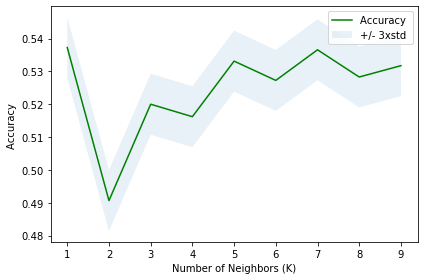

In [50]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [51]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.537292817679558 with k= 1


In [52]:
# Apply Nearest Neighbor model for recommendation

In [53]:
from sklearn.neighbors import NearestNeighbors

In [54]:
X

array([[6.000e+00, 1.300e+01, 1.200e+01, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [6.000e+00, 1.300e+01, 2.600e+01, ..., 0.000e+00, 0.000e+00,
        2.007e+03],
       [6.000e+00, 1.300e+01, 5.100e+01, ..., 0.000e+00, 0.000e+00,
        2.008e+03],
       ...,
       [4.000e+00, 9.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 9.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 1.500e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [55]:
# Here I use the Nearest Neighbor model to find the nearest 5 similar animes 
# (closest distances between the animes' attributes)
rec_neigh = NearestNeighbors(n_neighbors=6, algorithm='auto').fit(X)
distances, indexs = rec_neigh.kneighbors(X)

In [56]:
# Return the Index of the anime if its name is given in full
# Warning, the name has to be exact, even the upper case letters.
def full_id(name):
    try:
        df_model1[df_model1["title"] == name].index.tolist()[0]
        return df_model1[df_model1["title"] == name].index.tolist()[0]
    except:
        return "This is not a valid full name"

all_names = list(df_model1.title.values)

# If you only know a part of the anime name, you can get the list of possible full anime names, 
# The input can be lower case
def part_id(part):
    for name in all_names:
        if part.lower() in name.lower():
            print(name, all_names.index(name))

In [58]:
# Can get similar animes with input of anime name or anime index

def similar_animes(query=None,id=None):
    if id:
        for id in indexs[id][1:]:
            print(df_model1.iloc[id]["title"])
    if query:
        found_id = full_id(query)
        if found_id == "This is not a valid full name":
            print(found_id)
        else:
            for id in indexs[found_id][1:]:
                print(df_model1.iloc[id]["title"])

In [59]:
similar_animes(query="Naruto")

No Game No Life
Angel Beats!
Tokyo Ghoul
Code Geass: Hangyaku no Lelouch
Mirai Nikki (TV)


In [60]:
# It's well known that Naruto is a very popular anime, therefore, the 5 recommended options are very popular as well and
# some of them has many episodes and series such as Tokyo Ghoul and Code Geass with lots of fighting scenes.
# Personally, I would really recommend Angle Beats - a very touching anime

In [61]:
# When I put in a strange anime name it will cause error
similar_animes(query="shoe")

This is not a valid full name


In [62]:
# Therefore I check the available names for "slime"
part_id("shoe")

Kiki to Lala no Hoshi no Dance Shoes 13120


In [63]:
# After copy paste the name, it works!!
similar_animes(query="Kiki to Lala no Hoshi no Dance Shoes")

Kero Kero Keroppi no Daibouken: Fushigi na Mame no Ki
Kiki to Lala no Ohimesama ni Naritai
Kero Kero Keroppi no Yowamushi-ouji no Daibouken
Kero Kero Keroppi no Aladdin to Mahou no Lamp
Kitty-chan wo Sagase! Toyama-shi Stamp Rally


In [64]:
# Now I will set up random user response to predict an anime score

In [65]:
# Some of the string attributes are categorized to numbers
print(first_filtered)

{'type': {'Unknown': 0, 'Music': 1, 'ONA': 2, 'Special': 3, 'Movie': 4, 'OVA': 5, 'TV': 6}, 'source': {'Radio': 0, 'Digital manga': 1, 'Card game': 2, 'Book': 3, 'Picture book': 4, 'Web manga': 5, '4-koma manga': 6, 'Music': 7, 'Novel': 8, 'Other': 9, 'Light novel': 10, 'Game': 11, 'Visual novel': 12, 'Manga': 13, 'Original': 14, 'Unknown': 15}, 'status': {'Not yet aired': 0, 'Currently Airing': 1, 'Finished Airing': 2}, 'airing': {True: 0, False: 1}, 'rating': {'None': 0, 'R+ - Mild Nudity': 1, 'R - 17+ (violence & profanity)': 2, 'Rx - Hentai': 3, 'PG - Children': 4, 'G - All Ages': 5, 'PG-13 - Teens 13 or older': 6}}


In [66]:
print(first_filtered.keys())

dict_keys(['type', 'source', 'status', 'airing', 'rating'])


In [67]:
user_qs = []
for key in use_cols:
    if key == "0":
        break
    user_qs.append(key)
print(user_qs)

['type', 'source', 'episodes', 'status', 'airing', 'duration', 'rating', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'licensor']


In [68]:
genres = []
for key in use_cols:
    if key not in user_qs:
        genres.append(key)
genres.remove('year')
print(genres)

['0', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


In [69]:
# Here are the attributes for the user to input
print(use_cols)

['type', 'source', 'episodes', 'status', 'airing', 'duration', 'rating', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'licensor', '0', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri', 'year']


In [70]:
# Use random to random the user response invarious categories: 'type', 'source', 'status', 'airing', 'rating' and the genres
# The remaining attributes' default value would be the column's mean value, the anime year is set to 2017
import random
import numpy

user_response = {}
gen_choice = random.randint(1, 5)
gen_str = ""
for choice in range(gen_choice):
    gen_str += ", "
    gen_str += str(random.choice(genres))
gen_default = []
for gen in genres:
    if gen in gen_str:
        gen_default.append(1)
    else:
        gen_default.append(0)
response_default = []
for qs in use_cols:
    if qs not in user_qs:
        break
    if qs in first_filtered.keys():
        key_list = list(first_filtered[qs].keys()) 
        val_list = list(first_filtered[qs].values()) 
        first = random.choice(val_list)
        response_default.append(first)
        user_response[qs] = key_list[val_list.index(first)]
    else:
        response_default.append(df_model1[qs].mean())
        user_response[qs] = df_model1[qs].mean()
response_default.extend(gen_default)
response_default.append(2017)
user_response['genre'] = gen_str
user_response['year'] = 2017
print("User input is:")
print("")
print(user_response)
print(response_default)

User input is:

{'type': 'Movie', 'source': 'Card game', 'episodes': 11.665354330708661, 'status': 'Currently Airing', 'airing': False, 'duration': 26.237322491727163, 'rating': 'R - 17+ (violence & profanity)', 'scored_by': 11460.02527973477, 'rank': 5739.031634203619, 'popularity': 7220.259566238431, 'members': 22966.402679928167, 'favorites': 311.6496062992126, 'licensor': 0.6075424782428512, 'genre': ', Romance, Hentai, Josei, Parody, Drama', 'year': 2017}
[4, 2, 11.665354330708661, 1, 1, 26.237322491727163, 2, 11460.02527973477, 5739.031634203619, 7220.259566238431, 22966.402679928167, 311.6496062992126, 0.6075424782428512, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2017]


In [71]:
# Return the anime score from the input
df2 = pd.DataFrame([response_default], columns=use_cols)
df_test = df_model1.append(df2, sort = True)
X_test = df_test[use_cols].values
x_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

print(x_test)
print(len(x_test[len(x_test) - 1]))
score = neigh.predict([x_test[len(x_test) - 1]])
print("The predicted anime score is: " + str(score))

[[ 1.07744696  0.07189703  0.00771168 ... -0.05196952 -0.0532891
   1.60032445]
 [ 1.07744696  0.07189703  0.33033215 ... -0.05196952 -0.0532891
   1.59478643]
 [ 1.07744696  0.07189703  0.90644012 ... -0.05196952 -0.0532891
   1.59589404]
 ...
 [ 0.41939851 -1.42972166 -0.24577583 ... -0.05196952 -0.0532891
  -0.62817447]
 [-0.89669838  0.82270638 -0.24577583 ... -0.05196952 -0.0532891
  -0.62817447]
 [-0.23864993 -4.05755438  0.         ... -0.05196952 -0.0532891
   1.60586247]]
58
The predicted anime score is: [6]


In [74]:
# Here, an anime about Historical and Space for children which originate from Picture book has a decent score (7)
# This makes sense because this anime seems to be very interesting for children 
# and would attract lots of viewers for education material

In [79]:
# Use random to random the user response invarious categories: 'type', 'source', 'status', 'airing', 'rating' and the genres
# The remaining attributes' default value would be the column's mean value, the anime year is set to 2017
import random
import numpy

user_response = {}
gen_choice = random.randint(1, 5)
gen_str = ""
for choice in range(gen_choice):
    gen_str += ", "
    gen_str += str(random.choice(genres))
gen_default = []
for gen in genres:
    if gen in gen_str:
        gen_default.append(1)
    else:
        gen_default.append(0)
response_default = []
for qs in use_cols:
    if qs not in user_qs:
        break
    if qs in first_filtered.keys():
        key_list = list(first_filtered[qs].keys()) 
        val_list = list(first_filtered[qs].values()) 
        first = random.choice(val_list)
        response_default.append(first)
        user_response[qs] = key_list[val_list.index(first)]
    else:
        response_default.append(df_model1[qs].mean())
        user_response[qs] = df_model1[qs].mean()
response_default.extend(gen_default)
response_default.append(2017)
user_response['genre'] = gen_str
user_response['year'] = 2017
print("User input is:")
print("")
print(user_response)

User input is:

{'type': 'ONA', 'source': 'Digital manga', 'episodes': 11.665354330708661, 'status': 'Finished Airing', 'airing': True, 'duration': 26.237322491727163, 'rating': 'None', 'scored_by': 11460.02527973477, 'rank': 5739.031634203619, 'popularity': 7220.259566238431, 'members': 22966.402679928167, 'favorites': 311.6496062992126, 'licensor': 0.6075424782428512, 'genre': ', Sports, Shounen, Yaoi, Game', 'year': 2017}


In [80]:
# Return the anime score from the input
df2 = pd.DataFrame([response_default], columns=use_cols)
df_test = df_model1.append(df2, sort = True)
X_test = df_test[use_cols].values
x_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
score = neigh.predict([x_test[len(x_test) - 1]])
print("The predicted anime score is: " + str(score))

The predicted anime score is: [6]


In [ ]:
# Here the anime that has an Unknown source with Music genre and has Rx-Hentai rate (censored info related) has a low score (4)
# This makes sense because it doesn't sound appealing to watch a porn anime that has music in it

,Unnamed: 0,title,type,source,episodes,status,airing,duration,rating,score,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,year
0,0,Inu x Boku SS,6,13,12,2,1,24.0,6,7.63,...,0,0,0,0,1,0,0,0,0,2012
1,1,Seto no Hanayome,6,13,26,2,1,24.0,6,7.89,...,0,0,0,0,0,0,0,0,0,2007
2,2,Shugo Chara!! Doki,6,13,51,2,1,24.0,4,7.55,...,0,0,0,0,0,0,0,0,0,2008
3,3,Princess Tutu,6,14,38,2,1,16.0,6,8.21,...,0,0,0,0,0,0,0,0,0,2002
4,4,Bakuman. 3rd Season,6,13,25,2,1,24.0,6,8.67,...,0,0,0,0,0,0,0,0,0,2012
